Importing all relavant packages

In [239]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load Dataset

In [240]:
healthcare = pd.read_csv("../Healthcare Dataset/healthcare_dataset.csv")



Data Preprocessing and Feature Engineering

In [241]:
healthcare.head(10)


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [242]:
healthcare.isnull().sum()

# Check if there are any null rows

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [243]:
healthcare.duplicated().sum() 

# Checked and found out there were 534 Duplicated rows

534

In [244]:
healthcare = healthcare.drop_duplicates()

# Removed Duplicated rows 

In [245]:
healthcare.describe()

,Age,Billing Amount,Room Number
count,54966.000000,54966.000000,54966.000000
mean,51.535185,25544.306284,301.124404
std,19.605661,14208.409711,115.223143
min,13.000000,-2008.492140,101.000000
25%,35.000000,13243.718641,202.000000
50%,52.000000,25542.749145,302.000000
75%,68.000000,37819.858159,401.000000
max,89.000000,52764.276736,500.000000


In [246]:
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [247]:
healthcare['Name'] = healthcare['Name'].str.lower()

print(healthcare['Name'].head())

# Convert all names in the 'Name' column to lowercase

0    bobby jackson
1     leslie terry
2      danny smith
3     andrew watts
4    adrienne bell
Name: Name, dtype: object


In [248]:
print(healthcare[healthcare['Billing Amount'] < 0])  # Rows with negative billing amounts
healthcare = healthcare[healthcare['Billing Amount'] >= 0]

# Remove rows with negative billing amounts

                           Name  Age  Gender Blood Type Medical Condition  \
132             ashley erickson   32  Female        AB-            Cancer   
799           christopher weiss   49  Female        AB-            Asthma   
1018              ashley warner   60    Male         A+      Hypertension   
1421               jay galloway   74  Female         O+            Asthma   
2103          joshua williamson   72  Female         B-          Diabetes   
...                         ...  ...     ...        ...               ...   
52213  mr. christopher alvarado   74    Male        AB+           Obesity   
52629          gabrielle decker   66    Male        AB-         Arthritis   
53204             ashley warner   55    Male         A+      Hypertension   
53232              daniel drake   68  Female         B+      Hypertension   
54136         dr. michael mckay   64    Male         O+            Cancer   

      Date of Admission               Doctor                   Hospital  \


In [249]:
print(healthcare[healthcare['Billing Amount'] < 0])  # Should return an empty DataFrame

Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []


In [250]:
print(healthcare['Gender'].unique())  # Check for inconsistencies
print(healthcare['Blood Type'].unique())


['Male' 'Female']
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']


In [251]:
healthcare['Date of Admission'] = pd.to_datetime(healthcare['Date of Admission'], errors='coerce')
healthcare['Discharge Date'] = pd.to_datetime(healthcare['Discharge Date'], errors='coerce')

healthcare = healthcare.dropna(subset=['Date of Admission', 'Discharge Date'])

healthcare['Admission Duration'] = (
    healthcare['Discharge Date'] - healthcare['Date of Admission']
).dt.days


# Added feature date of admission

In [252]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['Child', 'Youth', 'Adult', 'Middle-aged', 'Senior']
healthcare['Age Group'] = pd.cut(healthcare['Age'], bins=bins, labels=labels)

# Added Feature Age Group in bins 

In [253]:
healthcare['Billing Per Day'] = healthcare['Billing Amount'] / healthcare['Admission Duration']

# Added Feature for Billing/day

In [254]:
# Remove the specified columns: 'Name', 'Doctor', 'Room Number'
columns_to_remove = ['Name',  'Room Number']
healthcare = healthcare.drop(columns=columns_to_remove)

# Verify the changes by displaying the remaining columns
print("Remaining columns in the dataset:")
print(healthcare.columns)


Remaining columns in the dataset:
Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission',
       'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results',
       'Admission Duration', 'Age Group', 'Billing Per Day'],
      dtype='object')


In [255]:
healthcare.shape


(54860, 16)

In [256]:
healthcare.describe(include = 'O')

,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Admission Type,Medication,Test Results
count,54860,54860,54860,54860,54860,54860,54860,54860,54860
unique,2,8,6,40276,39815,5,3,5,3
top,Male,A-,Arthritis,Michael Smith,LLC Smith,Cigna,Elective,Lipitor,Abnormal
freq,27449,6882,9207,27,44,11115,18437,11018,18399


In [257]:
healthcare.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Admission Duration,Age Group,Billing Per Day
0,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,Urgent,2024-02-02,Paracetamol,Normal,2,Youth,9428.140653
1,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,Emergency,2019-08-26,Ibuprofen,Inconclusive,6,Middle-aged,5607.221214
2,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,Emergency,2022-10-07,Aspirin,Normal,15,Senior,1863.673072
3,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,Elective,2020-12-18,Ibuprofen,Abnormal,30,Youth,1263.659414
4,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,Urgent,2022-10-09,Penicillin,Abnormal,20,Adult,711.915891


What are the work done (Preproccessing)
1. Removed duplicated rows
2. Checked if there are any null values in any row
3. Standardised the name of the patients to lowercase since they were inconsistently capitalized, with some names in uppercase, lowercase, and mixed case formats.
4. Removed Billing that are negative numbers 
5. Checked that there were only 2 Genders and No blood types that were out of the Normal
6. Added Admission Duration as a new feature 
7. Added Age Group Categorisation 
8. Added Billing/Admission day
9. Removed some features that does not affect relevancy of the data (Name, Room Number)


Next we will look at some distribution and Visualisation

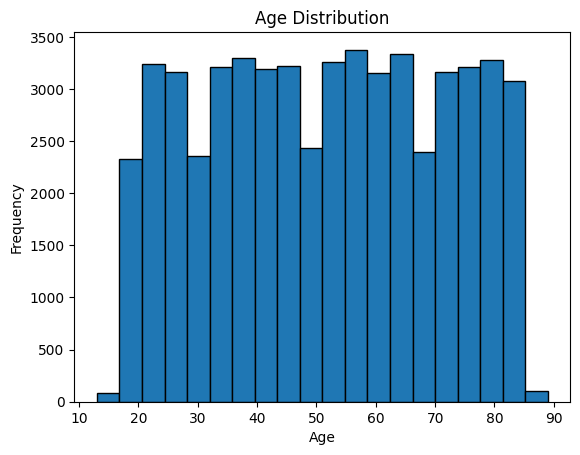

In [258]:
import matplotlib.pyplot as plt

plt.hist(healthcare['Age'], bins=20, edgecolor='k')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Data are mostly focus on 17-86 Years old patients with a small amount of data from 14-16 and above 86

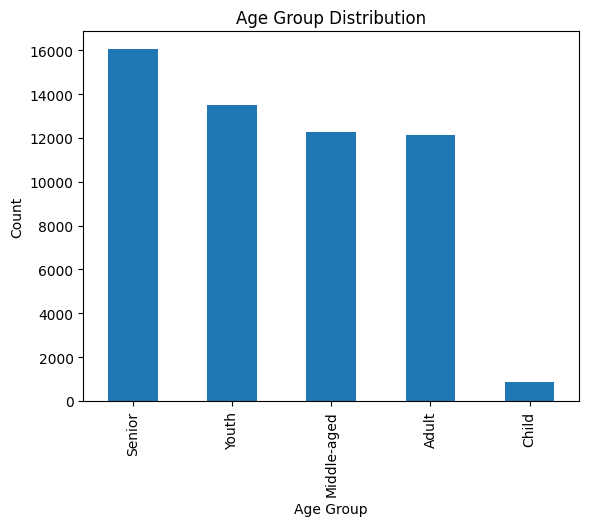

In [259]:
healthcare['Age Group'].value_counts().plot(kind='bar', title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# The largest set of data is from Seniors while the smallest is from children. Youth, Middle-aged and Adult have similar distribution

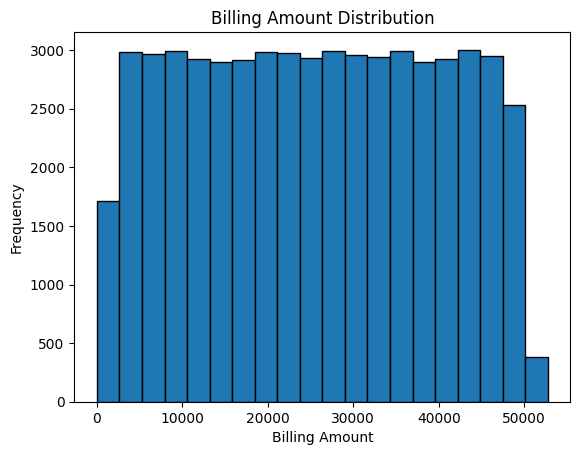

count    54860.000000
mean     25594.633637
std      14175.867041
min          9.238787
25%      13299.747940
50%      25593.873000
75%      37847.066671
max      52764.276736
Name: Billing Amount, dtype: float64


In [260]:
# Histogram
plt.hist(healthcare['Billing Amount'], bins=20, edgecolor='k')
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

billing_stats = healthcare['Billing Amount'].describe()
print(billing_stats)

# Max billing amount in a Single invoice is 52764.276736469175
# Billing for 50000 in a single invoice is lower 

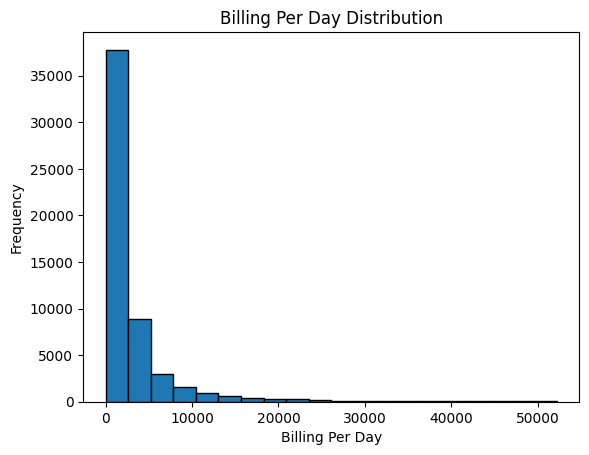

In [261]:
plt.hist(healthcare['Billing Per Day'], bins=20, edgecolor='k')
plt.title('Billing Per Day Distribution')
plt.xlabel('Billing Per Day')
plt.ylabel('Frequency')
plt.show()

# Shows that most billing for admission per day is <10000

In [262]:
gender_admission = pd.crosstab(healthcare['Gender'], healthcare['Admission Type'])
print(gender_admission)

# Little Correlation that type of admission is base on Gender(E.g Men more Emergency Admission) 

Admission Type  Elective  Emergency  Urgent
Gender                                     
Female              9265       9145    9001
Male                9172       8925    9352


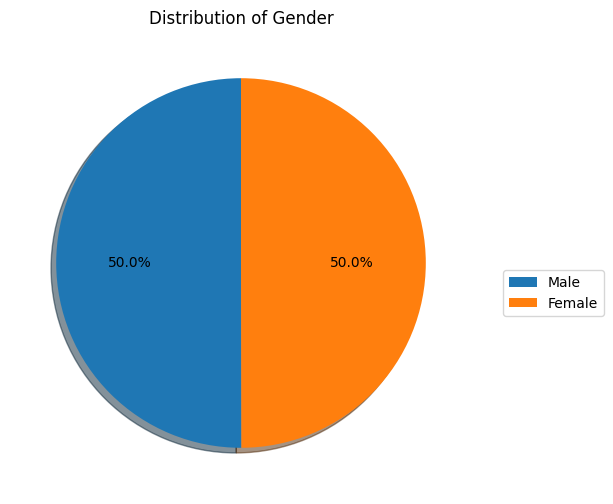

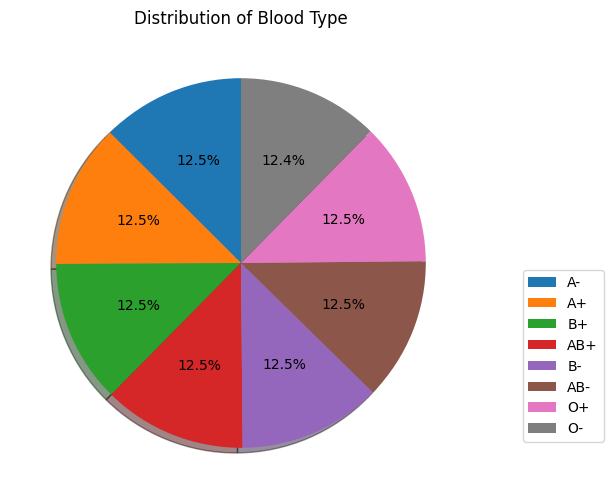

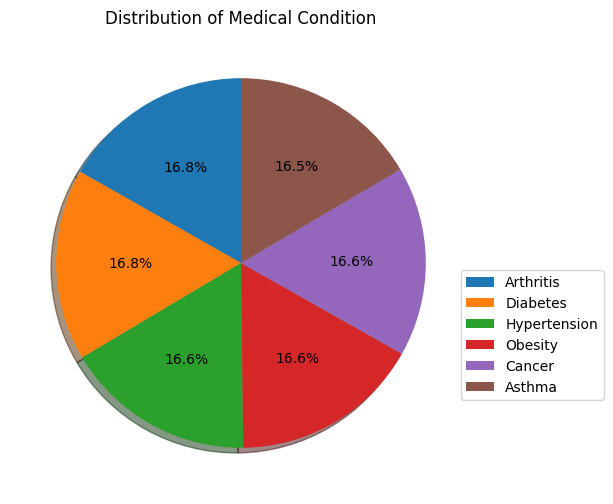

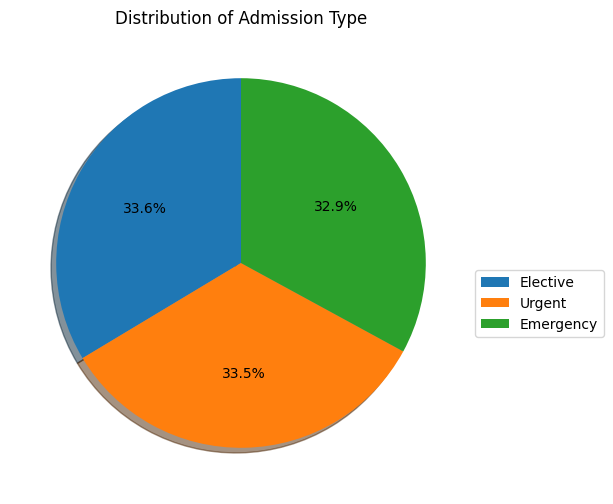

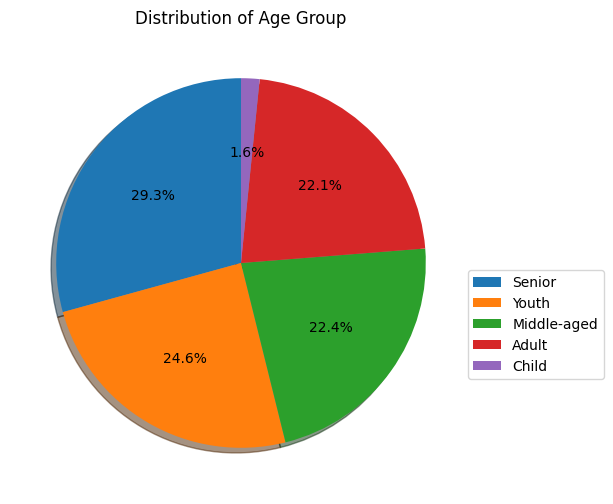

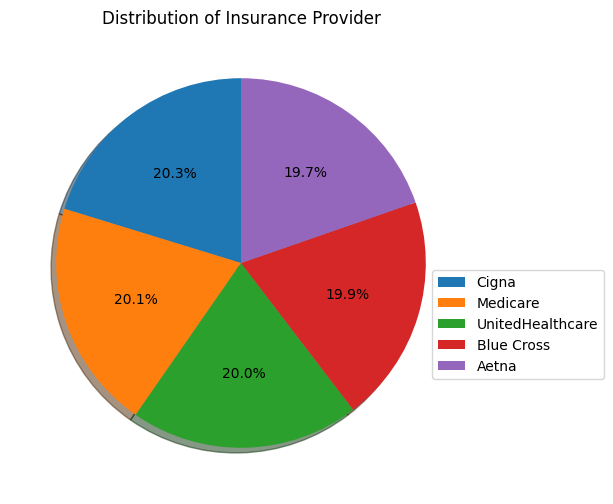

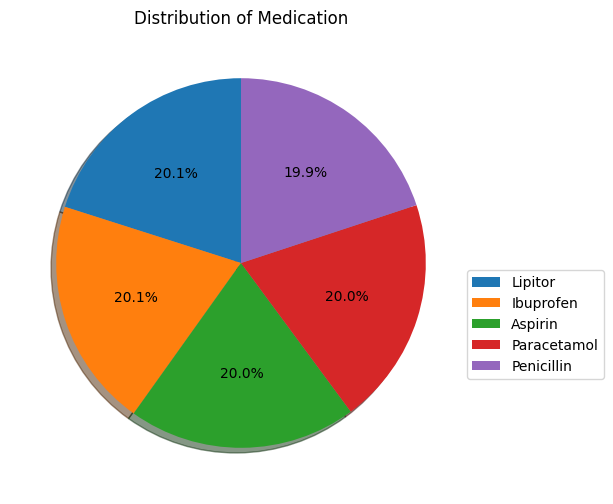

In [263]:
import matplotlib.pyplot as plt

# Function to create pie charts for categorical features
def plot_pie_charts(dataframe, features):
    for feature in features:
        plt.figure(figsize=(8, 6))
        dataframe[feature].value_counts().plot.pie(
            autopct='%1.1f%%', startangle=90, shadow=True, labeldistance=None
        )
        plt.title(f'Distribution of {feature}')
        plt.ylabel('')  # Remove the y-label for clarity
        plt.legend(loc="upper right", bbox_to_anchor=(1.3, 0.5))  # Adjust legend position
        plt.show()

# List of categorical features to visualize
categorical_features = [
    'Gender', 
    'Blood Type', 
    'Medical Condition', 
    'Admission Type', 
    'Age Group', 
    'Insurance Provider',
    'Medication'
]

# Generate pie charts
plot_pie_charts(healthcare, categorical_features)


In [264]:
# Group by 'Admission Type' and calculate statistics for 'Billing Amount'
billing_by_admission = healthcare.groupby('Admission Type')['Billing Amount'].describe()

print(billing_by_admission)

# Shows that data is balanced and type of admission does not really affect the amount paid

                  count          mean           std        min           25%  \
Admission Type                                                                 
Elective        18437.0  25663.342261  14187.363355   9.238787  13366.946970   
Emergency       18070.0  25551.133763  14130.358720  23.727930  13316.925027   
Urgent          18353.0  25568.439653  14209.523345  31.030955  13239.545654   

                         50%           75%           max  
Admission Type                                            
Elective        25706.745499  37860.403224  52764.276736  
Emergency       25465.122840  37703.320766  52271.663747  
Urgent          25595.593053  37929.669543  52373.032374  


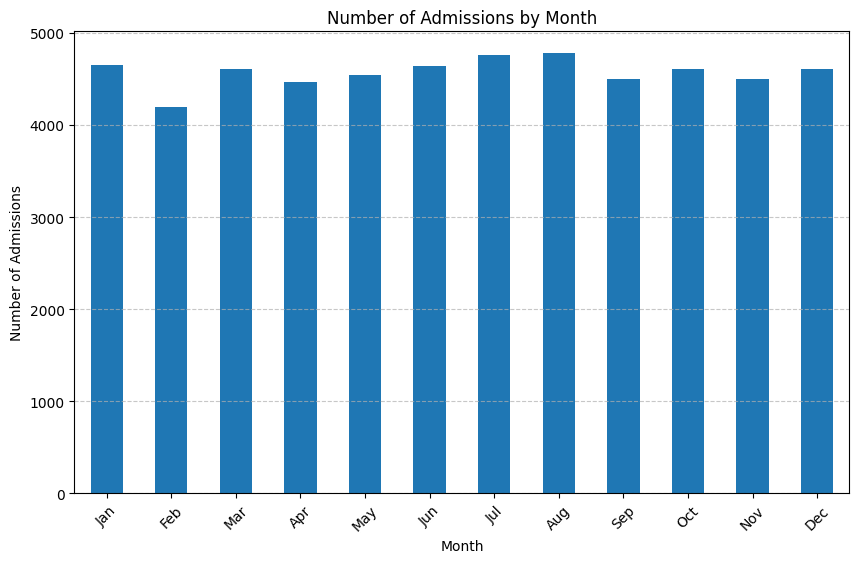

In [265]:
# Extract the month from the 'Date of Admission' column
healthcare['Month of Admission'] = pd.to_datetime(healthcare['Date of Admission']).dt.month

# Count the number of admissions per month
monthly_admissions = healthcare['Month of Admission'].value_counts().sort_index()

# Plot the number of admissions per month
plt.figure(figsize=(10, 6))
monthly_admissions.plot(kind='bar')
plt.title('Number of Admissions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Taking a look at if admission might be seasonal 

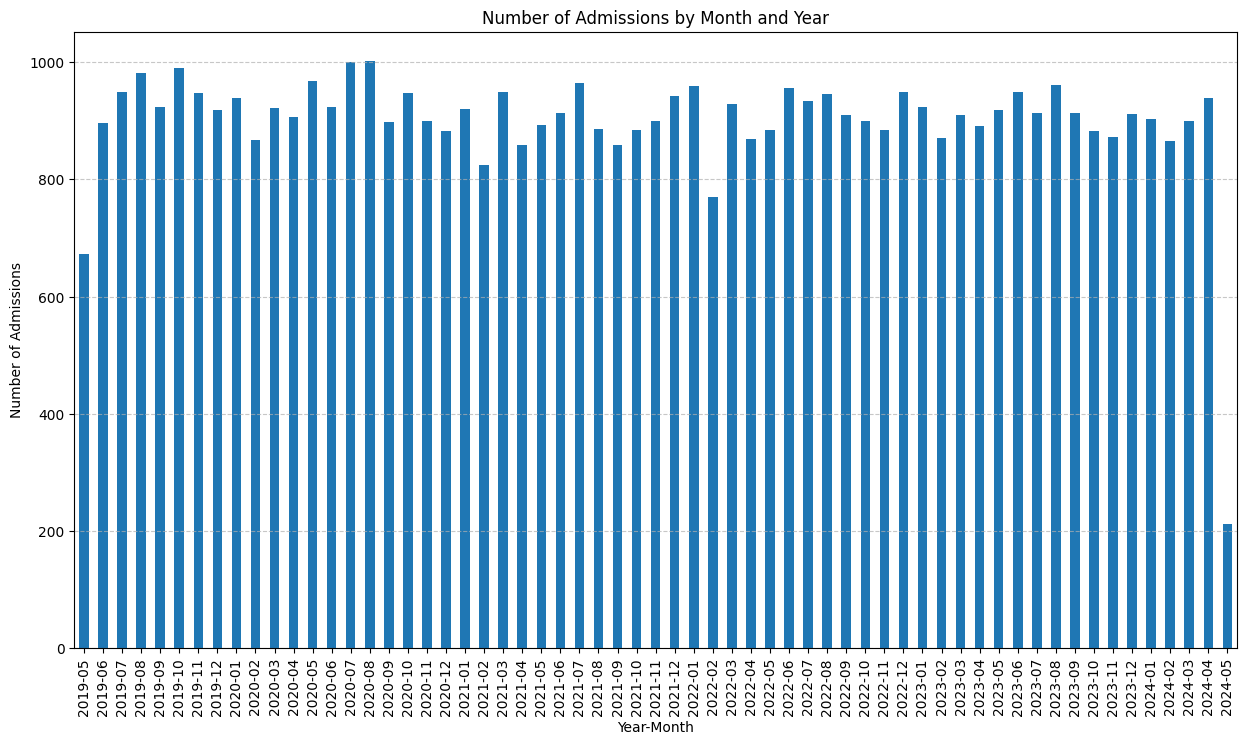

In [266]:
# Extract the year and month from the 'Date of Admission' column
healthcare['Year-Month of Admission'] = pd.to_datetime(healthcare['Date of Admission']).dt.to_period('M')

# Count the number of admissions per year-month
admissions_by_month_year = healthcare['Year-Month of Admission'].value_counts().sort_index()

# Plot the number of admissions per year-month
plt.figure(figsize=(15, 8))
admissions_by_month_year.plot(kind='bar')
plt.title('Number of Admissions by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Number of Admissions')
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Due to only having partial data on 2019/05 and 2024/05 , the numbers are lower in those 2 months 
# The other months does not have significant differences. No significant trend (E.g Less Admission during covid due to lockdown in 2020etc.)


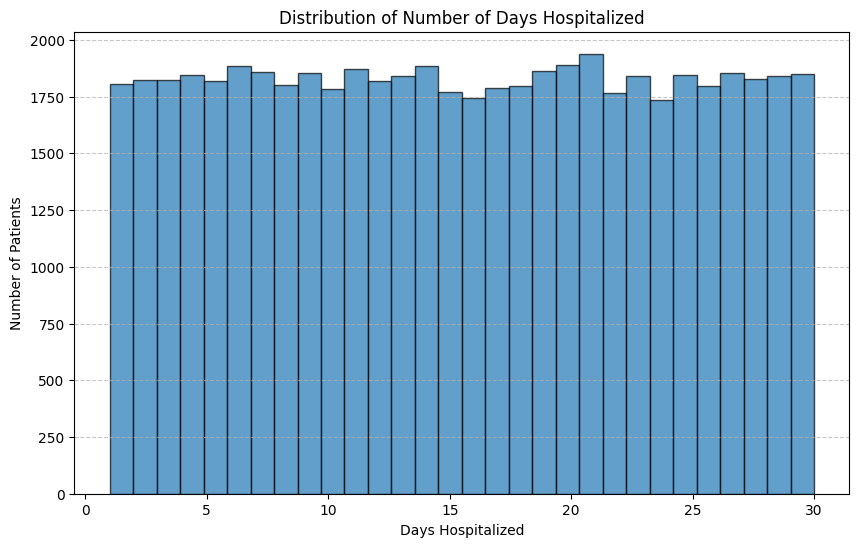

In [267]:
# Ensure 'Admission Duration' is calculated
healthcare['Admission Duration'] = (
    pd.to_datetime(healthcare['Discharge Date']) - pd.to_datetime(healthcare['Date of Admission'])
).dt.days

# Plot the distribution of 'Admission Duration'
plt.figure(figsize=(10, 6))
plt.hist(healthcare['Admission Duration'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Number of Days Hospitalized')
plt.xlabel('Days Hospitalized')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# No significant difference in Distribution of Number of Days Hospitalised

In [268]:
# Group by 'Gender' and 'Medical Condition' to count occurrences
gender_disease_table = healthcare.groupby(['Gender', 'Medical Condition']).size().unstack()

gender_disease_table

Medical Condition,Arthritis,Asthma,Cancer,Diabetes,Hypertension,Obesity
Gender,,,,,,
Female,4636,4498,4556,4599,4559,4563
Male,4571,4579,4565,4598,4572,4564


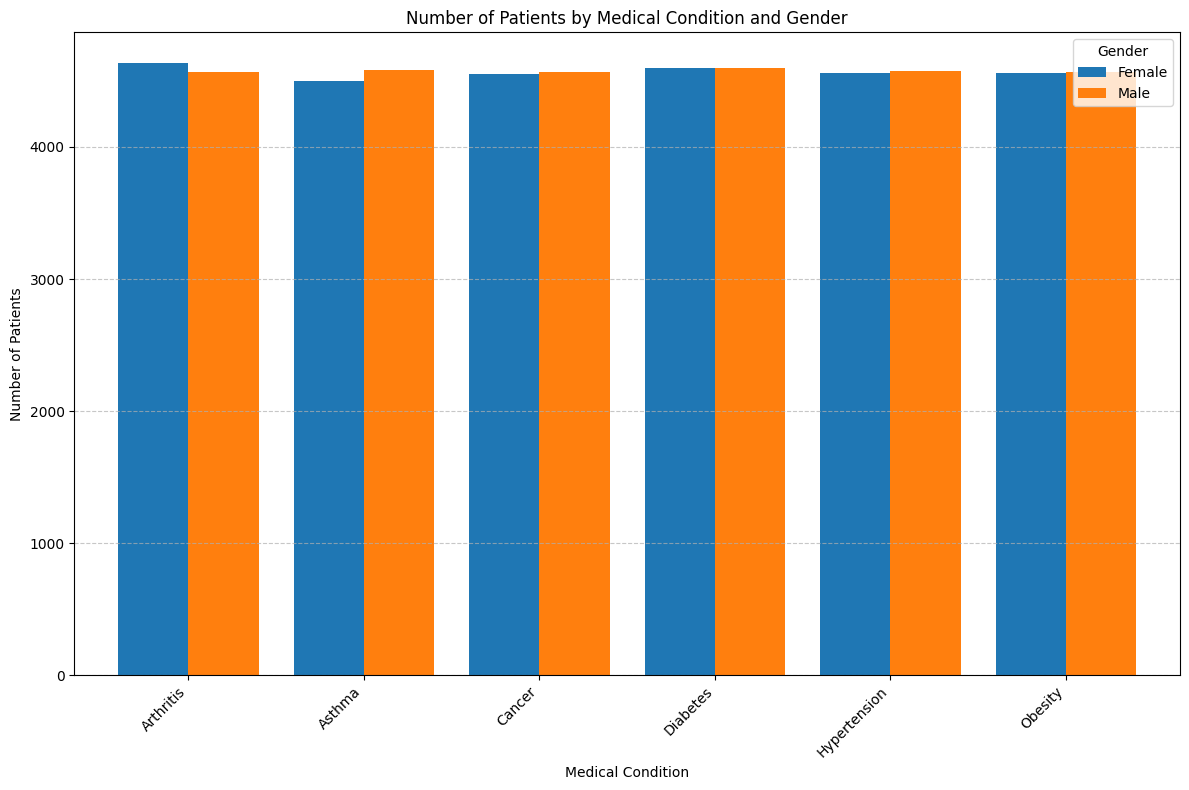

In [269]:
# Group data by 'Gender' and 'Medical Condition' and count occurrences
gender_disease_counts = healthcare.groupby(['Medical Condition', 'Gender']).size().unstack()

# Plot a side-by-side bar chart for each disease by gender
gender_disease_counts.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Number of Patients by Medical Condition and Gender')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to fit everything
plt.show()

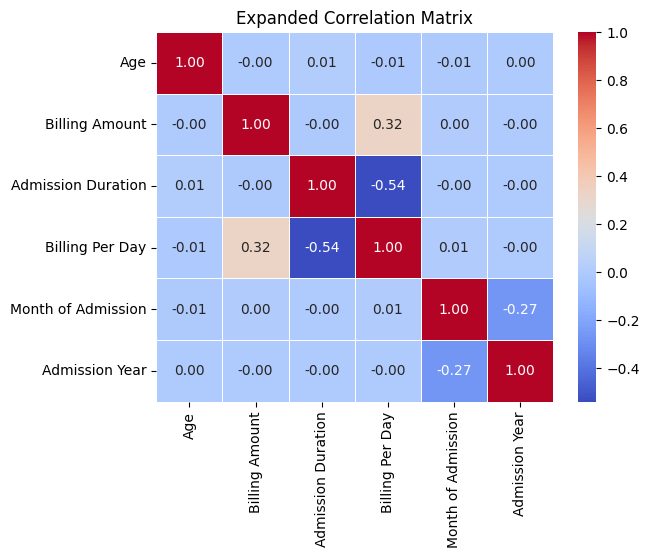

In [270]:
healthcare_encoded = pd.get_dummies(healthcare, columns=['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', 'Test Results'], drop_first=True)

healthcare['Admission Year'] = pd.to_datetime(healthcare['Date of Admission']).dt.year


# Select all numerical features
numerical_data = healthcare.select_dtypes(include=['number'])

# Recalculate and plot
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Expanded Correlation Matrix')
plt.show()

# The heatmap shows a moderate positive correlation between Billing Amount and Billing Per Day (r = 0.32), suggesting higher daily costs are associated with higher overall bills.
# A strong negative correlation between Billing Per Day and Admission Duration (r = -0.54) indicates longer stays often result in lower daily costs, potentially due to discounts or reduced treatment intensity over time.

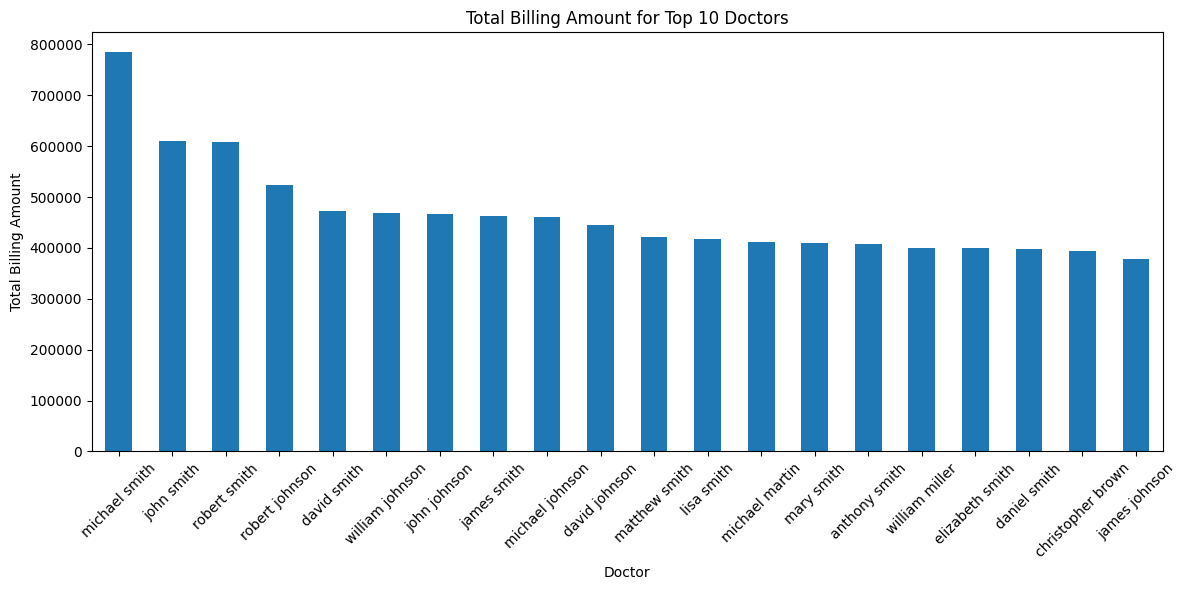

22.22967867874285

In [271]:


# Standardize Doctor names to lowercase to ensure consistency
healthcare['Doctor'] = healthcare['Doctor'].str.lower()

# Calculate total billing amount for the top 10 doctors
top_10_doctors = (
    healthcare.groupby('Doctor')['Billing Amount']
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

# Calculate total billing amount for each healthcare company
total_billing_by_insurance = (
    healthcare.groupby('Insurance Provider')['Billing Amount']
    .sum()
    .sort_values(ascending=False)
)

# Plot the top 10 doctors by total billing amount
plt.figure(figsize=(12, 6))
top_10_doctors.plot(kind='bar')
plt.title('Total Billing Amount for Top 10 Doctors')
plt.ylabel('Total Billing Amount')
plt.xlabel('Doctor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the billing amounts of the most and second most expensive doctors
most_expensive_doctor = top_10_doctors.iloc[0]
second_most_expensive_doctor = top_10_doctors.iloc[1]

# Calculate the percentage difference
percentage_difference = (
    (most_expensive_doctor - second_most_expensive_doctor) / most_expensive_doctor
) * 100

percentage_difference


# The Doctor Michael Smith is the most expensive doctor by a large margin of about 22.2 percent compared o the second most expensive doctor 

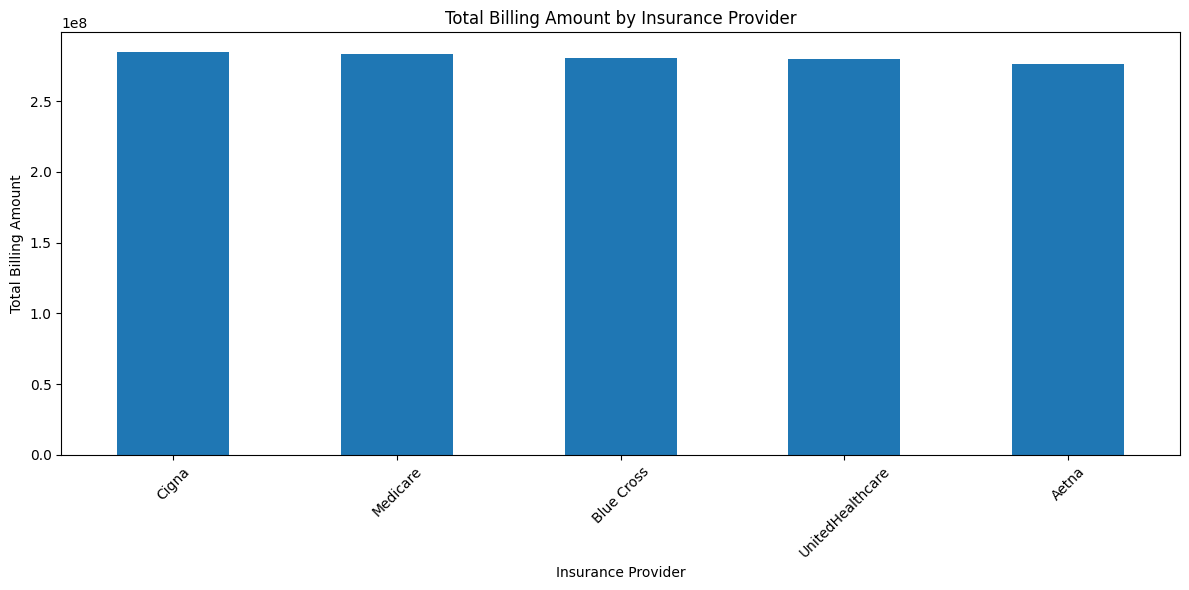

In [272]:
# Plot total billing amount for each healthcare company
plt.figure(figsize=(12, 6))
total_billing_by_insurance.plot(kind='bar')
plt.title('Total Billing Amount by Insurance Provider')
plt.ylabel('Total Billing Amount')
plt.xlabel('Insurance Provider')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# The difference insurance provider total billig cost up to similar amount 


C:\Users\jingc\AppData\Local\Temp\ipykernel_20312\1146590670.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  healthcare.groupby('Age Group')['Billing Amount']


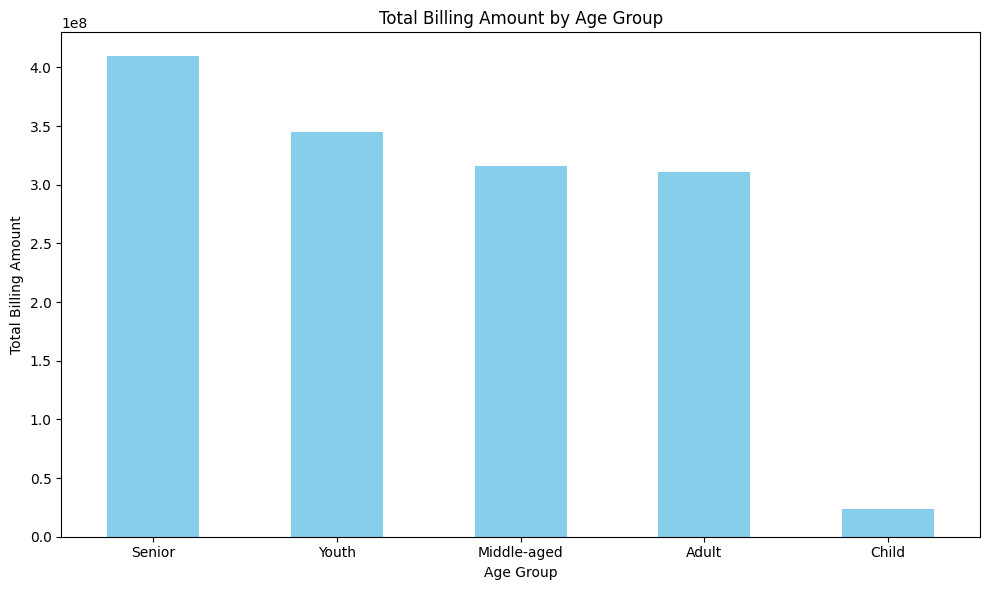

In [273]:
highest_billing_age_group = (
    healthcare.groupby('Age Group')['Billing Amount']
    .sum()
    .sort_values(ascending=False)
    
)

highest_billing_age_group


# Visualize the highest billing by age group
plt.figure(figsize=(10, 6))
highest_billing_age_group.plot(kind='bar', color='skyblue')
plt.title('Total Billing Amount by Age Group')
plt.ylabel('Total Billing Amount')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# The billing is skwewed towards the seniors and away from children.


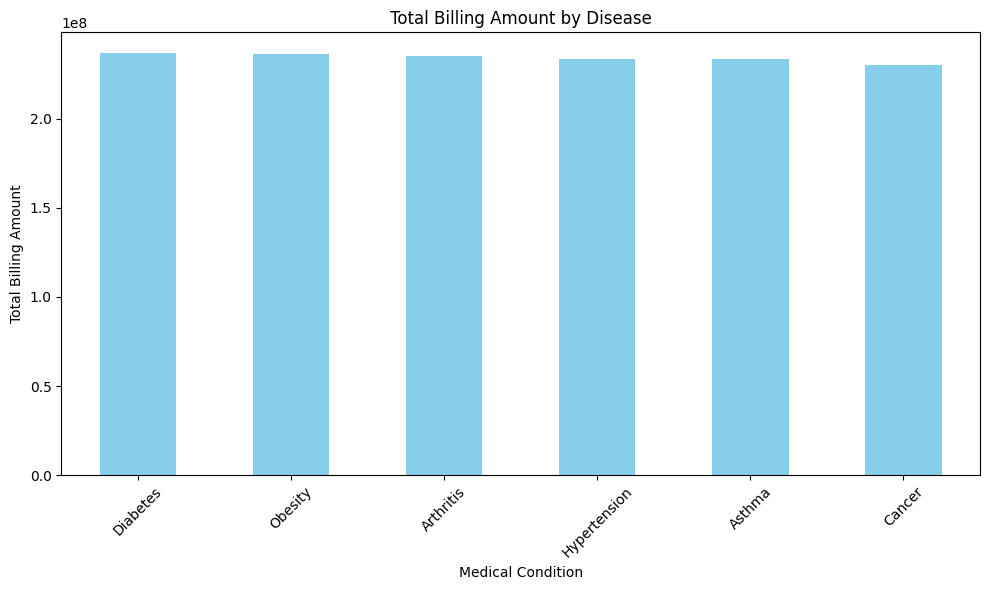

In [274]:
# Calculate total billing amount grouped by disease
total_billing_by_disease = (
    healthcare.groupby('Medical Condition')['Billing Amount']
    .sum()
    .sort_values(ascending=False)
)

# Visualize the total billing by disease
plt.figure(figsize=(10, 6))
total_billing_by_disease.plot(kind='bar', color='skyblue')
plt.title('Total Billing Amount by Disease')
plt.ylabel('Total Billing Amount')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# No much difference for total billing amount for different diseases 


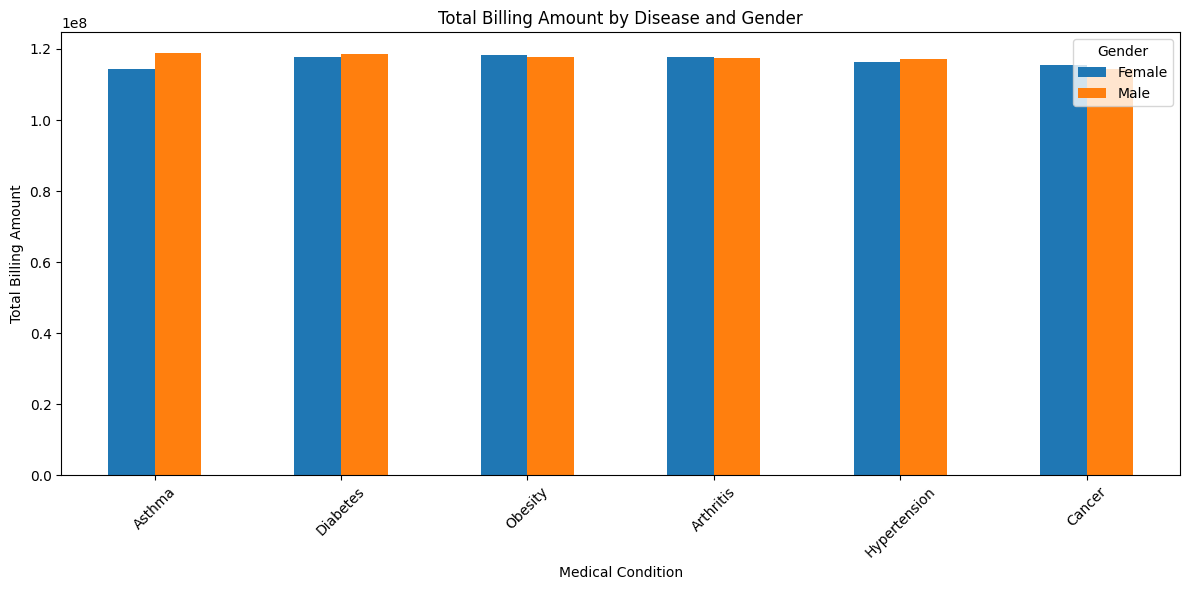

In [275]:

# Calculate total billing amount grouped by disease and gender
total_billing_by_disease_gender = (
    healthcare.groupby(['Medical Condition', 'Gender'])['Billing Amount']
    .sum()
    .unstack()
    .fillna(0)
    .sort_values(by=['Male', 'Female'], ascending=False)
)

# Plot the total billing amount by disease and gender
total_billing_by_disease_gender.plot(kind='bar', figsize=(12, 6))
plt.title('Total Billing Amount by Disease and Gender')
plt.ylabel('Total Billing Amount')
plt.xlabel('Medical Condition')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# For most diseases, the billing amounts for males and females are almost equal. This indicates that the treatment costs and frequency of occurrence for these diseases might be similar across genders in the dataset.

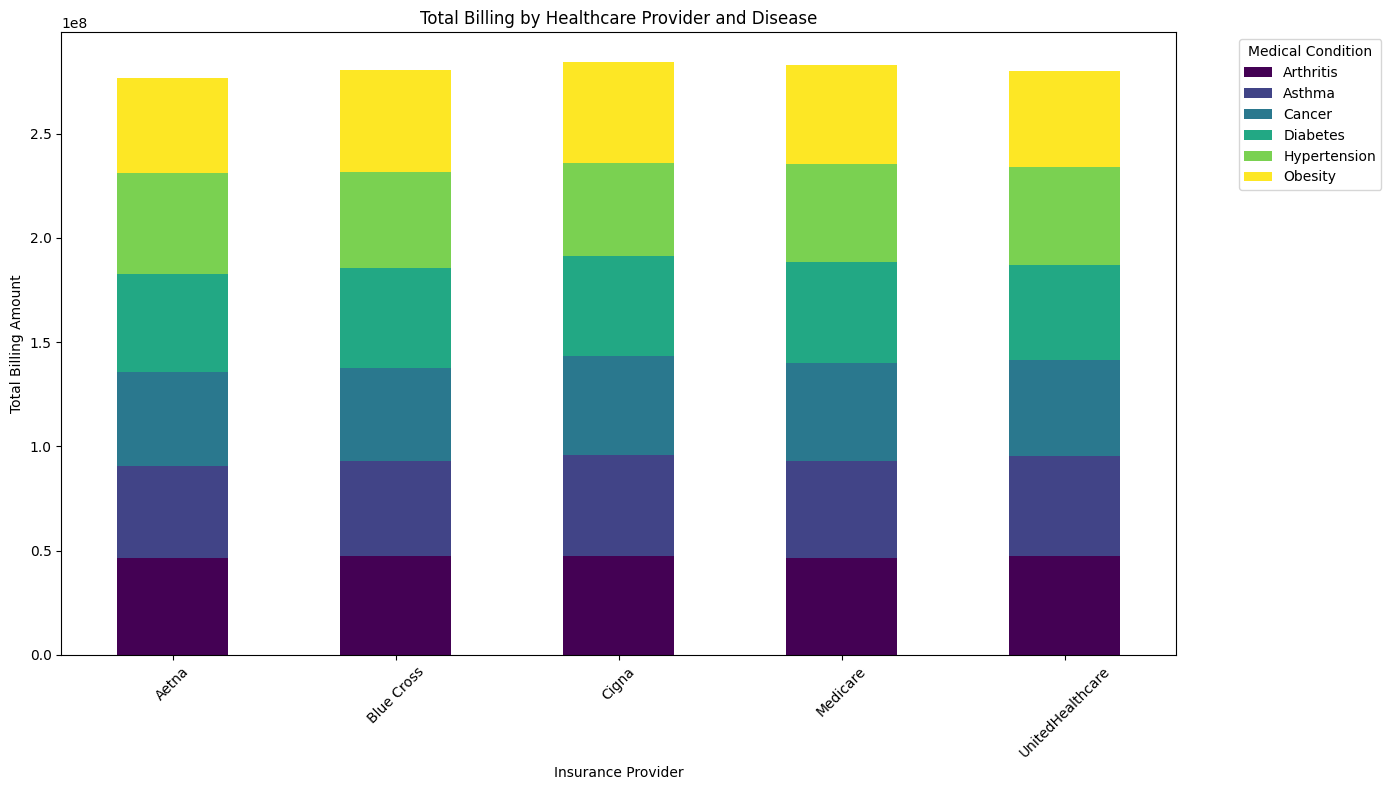

In [276]:
# Calculate total billing grouped by insurance provider and medical condition
billing_by_provider_disease = (
    healthcare.groupby(['Insurance Provider', 'Medical Condition'])['Billing Amount']
    .sum()
    .unstack()
    .fillna(0)
)

# Plot a stacked bar chart for total billing by healthcare provider and disease
billing_by_provider_disease.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Total Billing by Healthcare Provider and Disease')
plt.ylabel('Total Billing Amount')
plt.xlabel('Insurance Provider')
plt.xticks(rotation=45)
plt.legend(title='Medical Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Different Healthcare providers received similar amount from different diseases.

In [277]:
# Double-check the total count of patients by gender and insurance provider
patients_insured_check = (
    healthcare.groupby(['Gender', 'Insurance Provider'])
    .size()
    .reset_index(name='Total Patients')
    .pivot_table(index='Insurance Provider', columns='Gender', values='Total Patients', aggfunc='sum')
)

# Add a new column to calculate total patients insured across genders
patients_insured_check['Total Patients'] = patients_insured_check.sum(axis=1)

patients_insured_check

# Cigna has the most patient in the dataset and Aetna the smallest

Gender,Female,Male,Total Patients
Insurance Provider,,,
Aetna,5313,5482,10795
Blue Cross,5506,5431,10937
Cigna,5580,5535,11115
Medicare,5516,5502,11018
UnitedHealthcare,5496,5499,10995
